In [2]:
from qiskit import *

In [3]:
from qiskit.visualization import plot_histogram

In [4]:
%matplotlib inline

In [5]:
#generate the circuit with 3 qubits
circuit = QuantumCircuit(3,3)
circuit.x(0) #we want to see that q2 is gonna be 1 all the time
circuit.barrier()
circuit.h(1)
circuit.cx(1,2)
circuit.barrier()
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()
circuit.measure([0,1],[0,1])
circuit.cx(1,2)
circuit.cz(0,2)
circuit.measure([2],[2])
circuit.draw()

┌───┐ ░            ░      ┌───┐ ░ ┌─┐              
q_0: ┤ X ├─░────────────░───■──┤ H ├─░─┤M├─────────■────
     └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐      │    
q_1: ──────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├──■───┼────
           ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘┌─┴─┐ │ ┌─┐
q_2: ──────░──────┤ X ├─░────────────░──╫──╫─┤ X ├─■─┤M├
           ░      └───┘ ░            ░  ║  ║ └───┘   └╥┘
c_0: ═══════════════════════════════════╩══╬══════════╬═
                                           ║          ║ 
c_1: ══════════════════════════════════════╩══════════╬═
                                                      ║ 
c_2: ═════════════════════════════════════════════════╩═

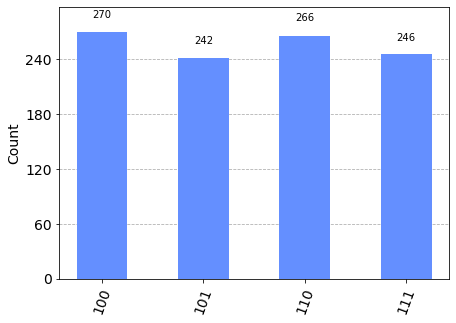

In [6]:
#we want to run our circuit on a simulator- not a real quantum computer for now.
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots=1024).result()
#show th results as a plot_histogram
plot_histogram(result.get_counts(circuit))

In [7]:
#we got the results as 100, 101, 110 and 111. We can clearly see that q2 is 1 all of them.
#if you don't know, the order of qubits: q2q1q0 -> 100 -> q2=1, q1=0, q0=0